In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

#from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import mixture # Package für GaussianMixture
from sklearn.decomposition import PCA # Package zur Dimensionsreduktion
from sklearn.neighbors import KNeighborsClassifier

# Call our data

In [6]:
# Einlesen der Trainings- und Testdaten
df_train = pd.read_csv("../data/zip.train", header=None, sep=" ")
df_test = pd.read_csv("../data/zip.test", header=None, sep=" ")

# Aufteilung in Daten und Target
X_train = df_train.iloc[:, 1:-1]
y_train = df_train.iloc[:,0]

X_test = df_test.iloc[:, 1:].values
y_test = df_test.iloc[:,0].values

# Skalierung der Trainingsdaten
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Wähle das KNN-Modell mit Parameter k = 2
clf = KNeighborsClassifier(n_neighbors=2)
clf.fit(X_train, y_train)

# Sagt für die Testdaten X die y-Werte voraus
y_pred = clf.predict(X_test)
#print(y_pred)

# Gibt die geschätzten WSKen für die Testdaten X zurück
y_pred_prob = clf.predict_proba(X_test)
#print(y_pred_prob)

# Gibt die durchschnittliche Accuracy für die gegeben Testdaten zurück
clf_score = clf.score(X_test, y_test)
print(clf_score)


FileNotFoundError: File b'../data/zip.train' does not exist

In [4]:
np.array(X_train)[0].reshape(-1,1).shape

NameError: name 'X_train' is not defined

# Hyperparameter optimieren

In [137]:
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score


# Erstellung einer List für unser k aus KNN
mykList = list(range(1,20))


# Nehme nur die Ungeraden
n = filter(lambda x: x % 2 != 0, mykList)
n = list(n)

# Leere Liste für meine cv scores
cv_scores = []

# perform 10-fold cross validation

for k in n:
    clf = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())


In [1]:
cv_scores

NameError: name 'cv_scores' is not defined

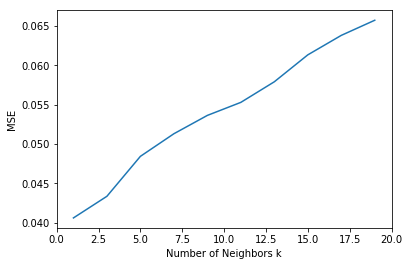

In [147]:
MSE = [1 - x for x in cv_scores] # Veränderung bei Misklassifizeriung

# Berechnung vom besten k
optimal_k = list([MSE.index(min(MSE))])
#print("The optimal number of neighbors is %d" % optimal_k)

# plot MSE vs k
plt.plot(n,MSE)
plt.xlabel('Number of Neighbors k')
plt.xlim(0,20,1)
plt.ylabel('MSE')
plt.show()


[0.0406010970065257,
 0.04335068885565185,
 0.04842760208345154,
 0.051298739710571306,
 0.053629653148886014,
 0.05528630118128797,
 0.05790336420671616,
 0.061324552591944914,
 0.06380073289817079,
 0.06572365292047078]

In [81]:
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier())
])

In [84]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(pipeline, param_grid = {
    "knn__n_neighbors": [8, 9, 10]
})
clf.fit(X_train, y_train)

print(clf.best_params_)

{'knn__n_neighbors': 8}


In [87]:
pred = clf.predict(X_test)

# Bewerte den die Genauigkeit/accuracy
print(accuracy_score(y_test, pred))
print(clf.score(X_test, y_test))

0.924265072247135
0.924265072247135


# Logistische Regression

In [256]:
from sklearn.model_selection import train_test_split

# Aufteilung in Daten und Target
X_train = df_train.iloc[:, 1:-1]
y_train = df_train.iloc[:,0]

X_test = df_test.iloc[:, 1:].values
y_test = df_test.iloc[:,0].values

# Skalierung der Trainingsdaten
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [257]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

print("Sagt eine Ziffer voraus: " + str(model.predict(X_test[0].reshape(1,-1)))) # Wandelt es in eine Series um, mit einer Spalte.
#print(model.predict(X_test))

pred = model.predict_proba(X_test)

model_score = model.score(X_test, y_test)
predicted = model.predict(X_test)

print(model_score)
print(pred)

Sagt eine Ziffer voraus: [9.]
0.9088191330343797
[[3.22871143e-05 6.33157514e-04 1.68099272e-04 ... 3.66884966e-03
  2.58244757e-02 9.45712479e-01]
 [1.23755853e-04 4.19190072e-05 3.12656597e-04 ... 4.92723401e-07
  3.22409614e-12 1.76606989e-11]
 [4.29570741e-07 4.71146179e-05 7.39924875e-02 ... 1.81014649e-06
  7.81620751e-03 3.84501835e-05]
 ...
 [1.62186205e-04 3.23579821e-06 3.87438126e-06 ... 1.66963475e-06
  4.35726299e-01 2.55687550e-05]
 [9.99470938e-01 3.62463784e-08 8.57587901e-06 ... 8.04756539e-05
  4.00157677e-04 1.98039787e-07]
 [9.30959076e-09 9.86983335e-01 8.55788471e-04 ... 2.72730964e-04
  6.44244888e-04 7.19410609e-03]]


In [258]:
from sklearn.metrics import log_loss


log_loss(y_test, pred)

0.44707087726930306

In [233]:
from sklearn.svm import SVC
import numpy as np

model = SVC()
#model = SVC(kernel = "rbf")
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

0.9422022919780767


In [234]:
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC())
])

In [235]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(pipeline, param_grid = {
    "svm__C": [0.001, 0.01, 0.1, 1, 10],
    "svm__gamma": [0.001, 0.01, 0.1, 1, 10]
})
clf.fit(X_train, y_train)

print(clf.best_params_) # {'svm__C': 10, 'svm__gamma': 0.001}

{'svm__C': 10, 'svm__gamma': 0.001}


In [236]:
print(clf.score(X_test, y_test)) # 0.9446935724962631

0.9446935724962631


In [229]:
#from sklearn.decomposition import PCA

#pca = PCA(n_components = 256)
#X_train_pca = pca.fit_transform(X_train)
#X_test_pca = pca.fit_transform(X_test)


#model = LogisticRegression()
#model.fit(X_train_pca, y_train)

#print("Sagt eine Ziffer voraus: " + str(model.predict(X_test[0].reshape(1,-1)))) # Wandelt es in eine Series um, mit einer Spalte.
#print(model.predict(X_test))

#model_score = model.score(X_test_pca, y_test)

#print(model_score)

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confustion_matrix

Text(0.5,103.74,'Predicted label')

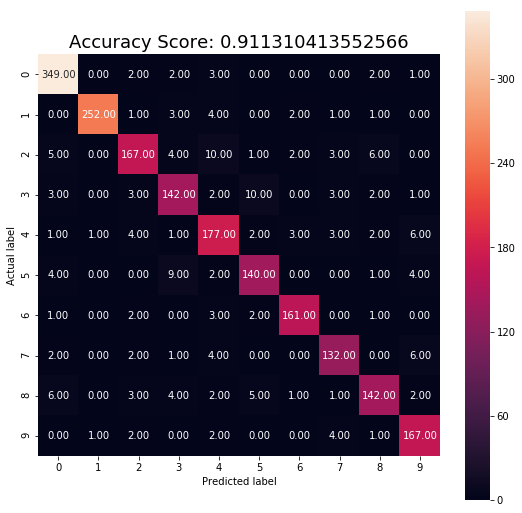

In [217]:
# Confusion Matrix
cm = metrics.confusion_matrix(y_test, predicted)

# Plotten
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, square = True, fmt=".2f")
title = 'Accuracy Score: {0}'.format(model_score)
plt.title(title, size = 18)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')